<a href="https://colab.research.google.com/github/Ochi-Shoichi5539/graduation_research/blob/main/vgg16_transfer_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D,Input
from keras.applications.vgg16 import VGG16
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import SGD
from keras.callbacks import CSVLogger

In [8]:
!unzip "/content/display.zip"
!unzip "/content/test.zip"
!unzip "/content/train.zip"
!unzip "/content/validation.zip"

Archive:  /content/display.zip
   creating: display/
  inflating: display/homura0077.jpg  
  inflating: display/homura0078.jpg  
  inflating: display/homura0079.jpg  
  inflating: display/homura0080.jpg  
  inflating: display/homura0081.jpg  
  inflating: display/homura0082.jpg  
  inflating: display/homura0083.jpg  
  inflating: display/homura0084.jpg  
  inflating: display/homura0088.jpg  
  inflating: display/homura0089.jpg  
  inflating: display/homura0090.jpg  
  inflating: display/homura0091.jpg  
  inflating: display/homura0093.jpg  
  inflating: display/homura0094.jpg  
  inflating: display/homura0095.jpg  
  inflating: display/homura0096.jpg  
  inflating: display/homura0097.jpg  
  inflating: display/homura0098.jpg  
  inflating: display/homura0099.jpg  
  inflating: display/homura0100.jpg  
  inflating: display/homura0101.jpg  
  inflating: display/homura0102.jpg  
  inflating: display/homura0103.jpg  
  inflating: display/homura0104.jpg  
  inflating: display/homura0105.jpg

In [9]:
n_categories=5
batch_size=32
train_dir='/content/train'
validation_dir='/content/validation'
file_name='vgg16_madomagi_fine'

base_model=VGG16(weights='imagenet',include_top=False,
                 input_tensor=Input(shape=(224,224,3)))

#add new layers instead of FC networks
x=base_model.output
x=GlobalAveragePooling2D()(x)
x=Dense(1024,activation='relu')(x)
prediction=Dense(n_categories,activation='softmax')(x)
model=Model(inputs=base_model.input,outputs=prediction)

#fix weights before VGG16 14layers
for layer in base_model.layers[:15]:
    layer.trainable=False

model.compile(optimizer=SGD(lr=0.0001,momentum=0.9),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [10]:
train_datagen=ImageDataGenerator(
    rescale=1.0/255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

validation_datagen=ImageDataGenerator(rescale=1.0/255)

train_generator=train_datagen.flow_from_directory(
    train_dir,
    target_size=(224,224),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

validation_generator=validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(224,224),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

hist=model.fit_generator(train_generator,
                         epochs=200,
                         verbose=1,
                         validation_data=validation_generator,
                         callbacks=[CSVLogger(file_name+'.csv')])

#save weights
model.save(file_name+'.h5')

Found 250 images belonging to 5 classes.
Found 150 images belonging to 5 classes.


/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/200
8/8 [==============================] - 64s 2s/step - loss: 1.7004 - accuracy: 0.2712 - val_loss: 1.7006 - val_accuracy: 0.2533
Epoch 2/200
8/8 [==============================] - 4s 474ms/step - loss: 1.6981 - accuracy: 0.2280 - val_loss: 1.6504 - val_accuracy: 0.2400
Epoch 3/200
8/8 [==============================] - 4s 479ms/step - loss: 1.6409 - accuracy: 0.2593 - val_loss: 1.6166 - val_accuracy: 0.2467
Epoch 4/200
8/8 [==============================] - 4s 478ms/step - loss: 1.6330 - accuracy: 0.2422 - val_loss: 1.5970 - val_accuracy: 0.2600
Epoch 5/200
8/8 [==============================] - 4s 476ms/step - loss: 1.6025 - accuracy: 0.2709 - val_loss: 1.5897 - val_accuracy: 0.2933
Epoch 6/200
8/8 [==============================] - 4s 506ms/step - loss: 1.5978 - accuracy: 0.2299 - val_loss: 1.5860 - val_accuracy: 0.2733
Epoch 7/200
8/8 [==============================] - 4s 502ms/step - loss: 1.5800 - accuracy: 0.2707 - val_loss: 1.5829 - val_accuracy: 0.2800
Epoch 8/200
8/8

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")
/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1948: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


Found 412 images belonging to 5 classes.

 test loss: 0.5363665223121643

 test_acc: 0.8276699185371399


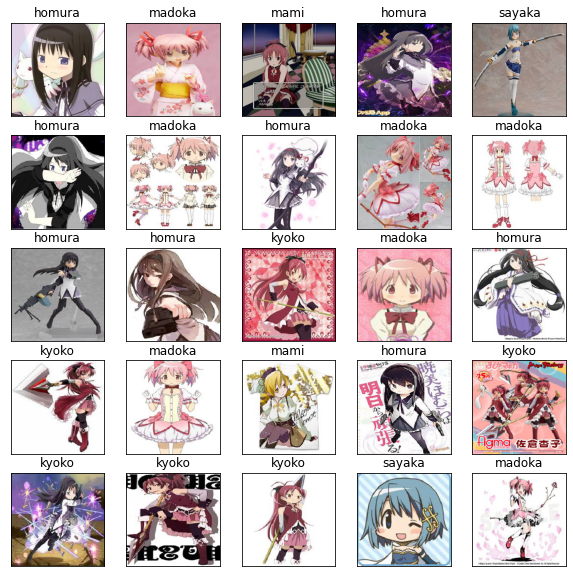

In [14]:
from keras.models import model_from_json
import matplotlib.pyplot as plt
import numpy as np
import os,random
from keras.preprocessing.image import img_to_array, load_img
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import SGD

batch_size=32
file_name='vgg16_madomagi_fine'
test_dir='/content/test'
display_dir='/content/display'
label=['homura','kyoko','madoka','mami','sayaka']

#load model and weights
json_string=open(file_name+'.json').read()
model=model_from_json(json_string)
model.load_weights(file_name+'.h5')

model.compile(optimizer=SGD(lr=0.0001,momentum=0.9),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

#data generate
test_datagen=ImageDataGenerator(rescale=1.0/255)

test_generator=test_datagen.flow_from_directory(
    test_dir,
    target_size=(224,224),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

#evaluate model
score=model.evaluate_generator(test_generator)
print('\n test loss:',score[0])
print('\n test_acc:',score[1])

#predict model and display images
files=os.listdir(display_dir)
img=random.sample(files,25)

plt.figure(figsize=(10,10))
for i in range(25):
    temp_img=load_img(os.path.join(display_dir,img[i]),target_size=(224,224))
    plt.subplot(5,5,i+1)
    plt.imshow(temp_img)
    #Images normalization
    temp_img_array=img_to_array(temp_img)
    temp_img_array=temp_img_array.astype('float32')/255.0
    temp_img_array=temp_img_array.reshape((1,224,224,3))
    #predict image
    img_pred=model.predict(temp_img_array)
    plt.title(label[np.argmax(img_pred)])
    #eliminate xticks,yticks
    plt.xticks([]),plt.yticks([])


plt.show()